<a href="https://colab.research.google.com/github/Serurays/Biomedical_Image_Analysis/blob/main/Biomedical_Image_Analysis_Part6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of the image: (190, 200, 3)
Center of Mass: (101.68547701295955, 107.10398891846177)
Shape of the Downsampled Image: (95, 100)
Shape of the Upsampled Image: (380, 400)


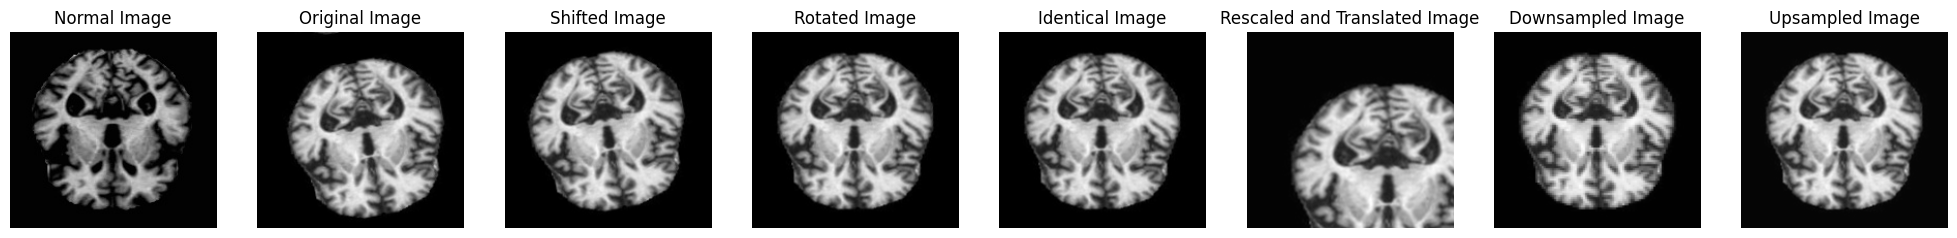

In [ ]:
import imageio.v2 as imageio
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

img = imageio.imread("brain_normal.jpg")

transformed = imageio.imread("transformed.jpg")
print("Shape of the image:", transformed.shape)

com = ndi.center_of_mass(np.mean(transformed, axis=2))
print("Center of Mass:", com)

d0 = transformed.shape[0] / 2 - com[0]
d1 = transformed.shape[1] / 2 - com[1]

shifted = ndi.shift(transformed, shift=[d0, d1, 0])

rotated = ndi.rotate(shifted, angle=-10, reshape=False)

mat = [[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]]

mat2 = [[0.8, 0, -20],
        [0, 0.8, -10],
        [0, 0, 1]]

identical = ndi.affine_transform(rotated, mat)

gray = np.dot(identical[..., :3], [0.2989, 0.5870, 0.1140])

rescaled = ndi.affine_transform(gray, mat2)

rotated_dn = ndi.zoom(gray, zoom=0.5)
print("Shape of the Downsampled Image:", rotated_dn.shape)

rotated_up = ndi.zoom(gray, zoom=2)
print("Shape of the Upsampled Image:", rotated_up.shape)

fig, axes = plt.subplots(1, 8, figsize=(25, 23))

axes[0].imshow(img, cmap="gray")
axes[0].set_title("Normal Image")
axes[0].axis("off")

axes[1].imshow(transformed, cmap="gray")
axes[1].set_title("Original Image")
axes[1].axis("off")

axes[2].imshow(shifted, cmap="gray")
axes[2].set_title("Shifted Image")
axes[2].axis("off")

axes[3].imshow(rotated, cmap="gray")
axes[3].set_title("Rotated Image")
axes[3].axis("off")

axes[4].imshow(identical, cmap="gray")
axes[4].set_title("Identical Image")
axes[4].axis("off")

axes[5].imshow(rescaled, cmap="gray")
axes[5].set_title("Rescaled and Translated Image")
axes[5].axis("off")

axes[6].imshow(rotated_dn, cmap="gray")
axes[6].set_title("Downsampled Image")
axes[6].axis("off")

axes[7].imshow(rotated_up, cmap="gray")
axes[7].set_title("Upsampled Image")
axes[7].axis("off")

plt.show()

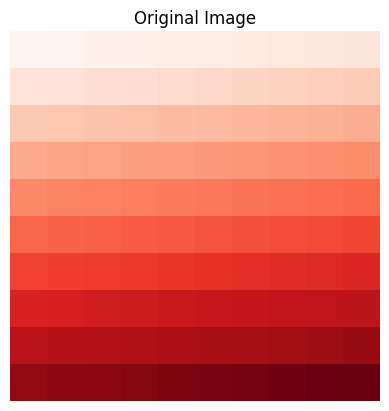

In [ ]:
img = np.arange(100).reshape([10, 10])
plt.imshow(img, cmap="Reds")
plt.title("Original Image")
plt.axis("off")
plt.show()

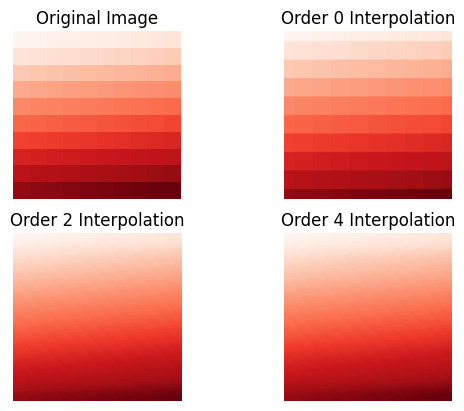

In [ ]:
zm1 = ndi.zoom(img, zoom=10, order=0)
zm2 = ndi.zoom(img, zoom=10, order=2)
zm3 = ndi.zoom(img, zoom=10, order=4)

fig, axes = plt.subplots(2, 2)

axes[0, 0].imshow(img, cmap="Reds")
axes[0, 0].axis("off")
axes[0, 0].set_title("Original Image")

axes[0, 1].imshow(zm1, cmap="Reds")
axes[0, 1].axis("off")
axes[0, 1].set_title("Order 0 Interpolation")

axes[1, 0].imshow(zm2, cmap="Reds")
axes[1, 0].axis("off")
axes[1, 0].set_title("Order 2 Interpolation")

axes[1, 1].imshow(zm3, cmap="Reds")
axes[1, 1].axis("off")
axes[1, 1].set_title("Order 4 Interpolation")

plt.show()

Original shape: (190, 200)
Upsampled shape: (760, 800)


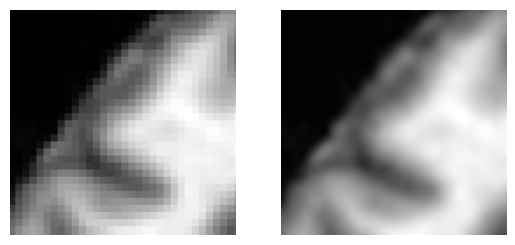

In [ ]:
up0 = ndi.zoom(gray, zoom=4, order=0)
up5 = ndi.zoom(gray, zoom=4, order=5)

print("Original shape:", gray.shape)
print("Upsampled shape:", up0.shape)

fig, axes = plt.subplots(1, 2)
axes[0].imshow(up0[128:256, 128:256], cmap="gray")
axes[1].imshow(up5[128:256, 128:256], cmap="gray")

for ax in axes:
  ax.axis("off")

plt.show()